## Predicting Heart Disease


### Introduction:

Heart disease is an umbrella term for a vast range of conditions that affect the heart. While there are many leading causes that can contribute to higher risks to heart disease, unhealthy lifestyle choices and genetics often play a large role. In Canada, heart disease is the second leading cause of death and leading cause of hospitalization (Government of Canada, 2022). This statistic leads us to wonder and study whether a predictive model can determine the presence of heart disease in a patient. Therefore, based on a dataset from 1988 consisting of 4 databases, Cleveland, Hungary, Switzerland, and Long Beach V, trends relating to heart disease will be used to predict the presence of the disease in individuals. Heart disease is an umbrella term for a vast range of conditions that affect the heart. While there are many leading causes that can contribute to higher risks to heart disease, unhealthy lifestyle choices and genetics often play a large role. In 
Canada, heart disease is the second leading cause of death and leading cause of hospitalization. This statistic leads us to wonder and study whether a predictive model can determine the presence of heart disease in a patient. Therefore, based on a dataset from 1988 consisting of 4 databases, Cleveland, Hungary, Switzerland, and Long Beach V, trends relating to heart disease will be used to predict the presence of the disease in individuals. Five attributes will be observed in order to successfully determine the presence of heart disease in a patient.

This data was retrieved from the `heart.csv` file in the Heart Disease Dataset directory, 
which can be found here: https://www.kaggle.com/datasets/johnsmith88/heart-disease-datasets


Observing the health reports of the patients in the dataset, the five most influential factors in predicting the detection of heart disease in patients will be determined

This will lead us to the question: **Can heart disease in a patient be predicted prior to diagnosis based upon the most influential factors within their health report?**

The goal of this project is to create a classification model that can accurately predict the presence of heart disease based on the most influential factors we determine. 

### Methods and Results:

Our general goal is to predict the `target` class by creating a K-NN Classification model with the optimal predictor variables that we will choose. Here are the steps that we will be taking to do this:


1. Read-in and tidy the dataset: Make sure that the tidy dataset criteria are all fulfilled.
2. Train/Test split: Split the dataset into training and testing sets.
3. Analyze and summarise our training set: We will visualize the training data through boxplots to see which variables fluctuate in range and median over different num categories.
4. Analyze predictor variables and select the ones of significance: We will create multiple recipes with different predictor variable combinations, and then analyze the resulting accuracies from the cross-validations of each model and choose the most accurate one.
5. Find the optimal value and build our final model.
6. Evaluation and Conclusion

### 1. Reading and Wrangling the Dataset
To begin our analysis we first loaded in the libraries that we would be using. Then, using `read_csv`, we first read in our dataset to better explore the variables and their relationship to the `target` variable, indicating the absence of heart disease, 0, and the presence of heart disease, 1. We then selected the predictors we wanted to use and checked if there were mission values in the data set using the `sum(is.na())` function.

In [1]:
library(tidyverse)
library(repr)
library(dplyr)
library(tidymodels)
library(ggplot2)
library(gridExtra)
library(GGally)


heart_data <- read_csv("project_data/heart.csv") |>
            mutate(target = as_factor(target))
print("Table 1.1")
slice(heart_data, 1:5)

heart_var <- heart_data |>
    select(age, exang, chol, thalach, trestbps, target)

print("Table 2.1") #Is the second table necessary??

slice(heart_var, 1:5)
sum(is.na(heart_data))

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

[1] "Table 1.1"


age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


[1] "Table 2.1"


age,exang,chol,thalach,trestbps,target
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<fct>
52,0,212,168,125,0
53,1,203,155,140,0
70,1,174,125,145,0
61,0,203,161,148,0
62,0,294,106,138,0


[1] 0

### 2. Splitting the Data
From here, we split the data with the seleced variables into a training set with 75% of the data, and a testing set with 25% of the data. To make sure the data is reproducible, we will be using 3456 as our seed number.

In [2]:
set.seed(3456)

heart_split <- initial_split(heart_var, prop = 0.75, strata = target)  
heart_train <- training(heart_split)   
heart_test <- testing(heart_split)

### 3. Analyzing and Summarizing the Training Data

As our total dataset contains 1025 instances, and since our training set is 75% of that, there will be 768 instances in the training set.

In [3]:
n_for_target <- heart_train |>
    group_by(target) |>
    summarize(n = n())

print("Table 3.1: Distribution of Diagnoses")
n_for_target

[1] "Table 3.1: Distribution of Diagnoses"


target,n
<fct>,<int>
0,374
1,394


By using `group_by()` with num as its parameter, and `summarize()` with `n = n()` as its parameter, a tibble that contains the number of instances for each `target` type is created.

In Table 3.1, the ratio between the presence of heart disease (`target` = 1) vs. without heart disease (`target` = 0) is nearly 1:1. 

In [4]:
mean_per_diagnosis <- heart_train |>
    group_by(target) |>
    summarize(mean_age = mean(age), mean_exang = mean(exang), mean_chol = mean(chol), mean_thalach = mean(thalach), mean_trestbps = mean(trestbps))
print("Table 3.2: Mean of Variables Across Diagnoses")
mean_per_diagnosis

[1] "Table 3.2: Mean of Variables Across Diagnoses"


target,mean_age,mean_exang,mean_chol,mean_thalach,mean_trestbps
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,56.64171,0.5454545,252.2112,139.6578,134.3583
1,52.74619,0.1370558,242.9898,158.0482,129.0482


Again, `group_by()` and `summarize()` are used to group the data by their `target` diagnoses, and then to find the means of all the data within those subgroups.

* We can see that in Table 3.2, patients with a `target` = 0 are on average, only around 4 years older than patients who have `target` = 1.
* Angina induced by exercise (`exang`), seems to be in a negative relationship with the diagnoses.
* The maximum heart rate of a patient (`thalach`) is higher for patients without heart disease compared to patients who do. This could mean that thalach could help determine if a patient's `target` value is 1 (has heart disease). 
* It seems that many of the values across diagnoses seem to have similar or slightly different mean values, which may be a point of concern for our model.

#### Visualizing the predictor variables
To better understand the relationships between the variables, we chose to use box plots. In this way, we can see the mean values for variables where there is a presence of heart disease, when target is 1, and when there is no heart disease, when the target is zero. Since the target variable only has two possible values, we decided to plot target on the x-axis.

[1] "Figure 3.3: Variable Distributions Across Diagnosis"


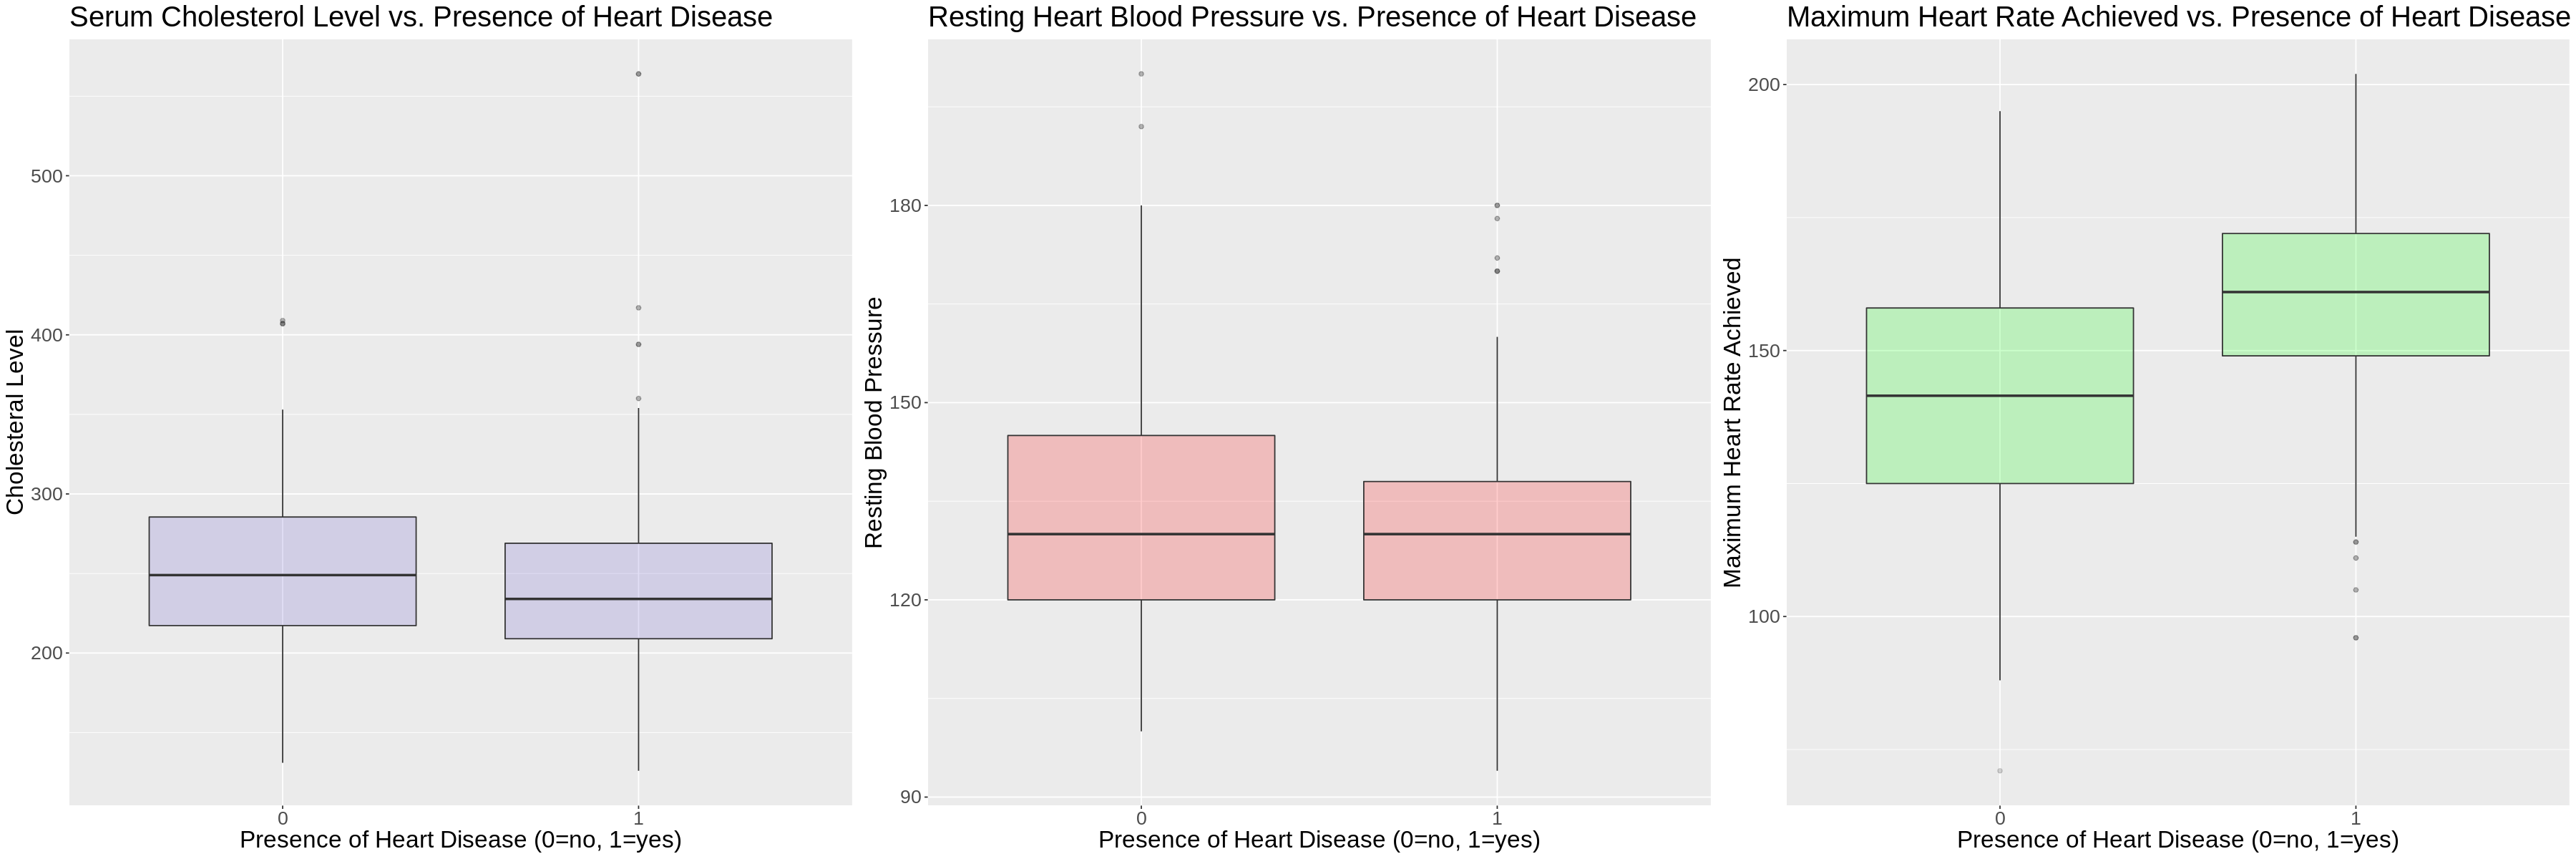

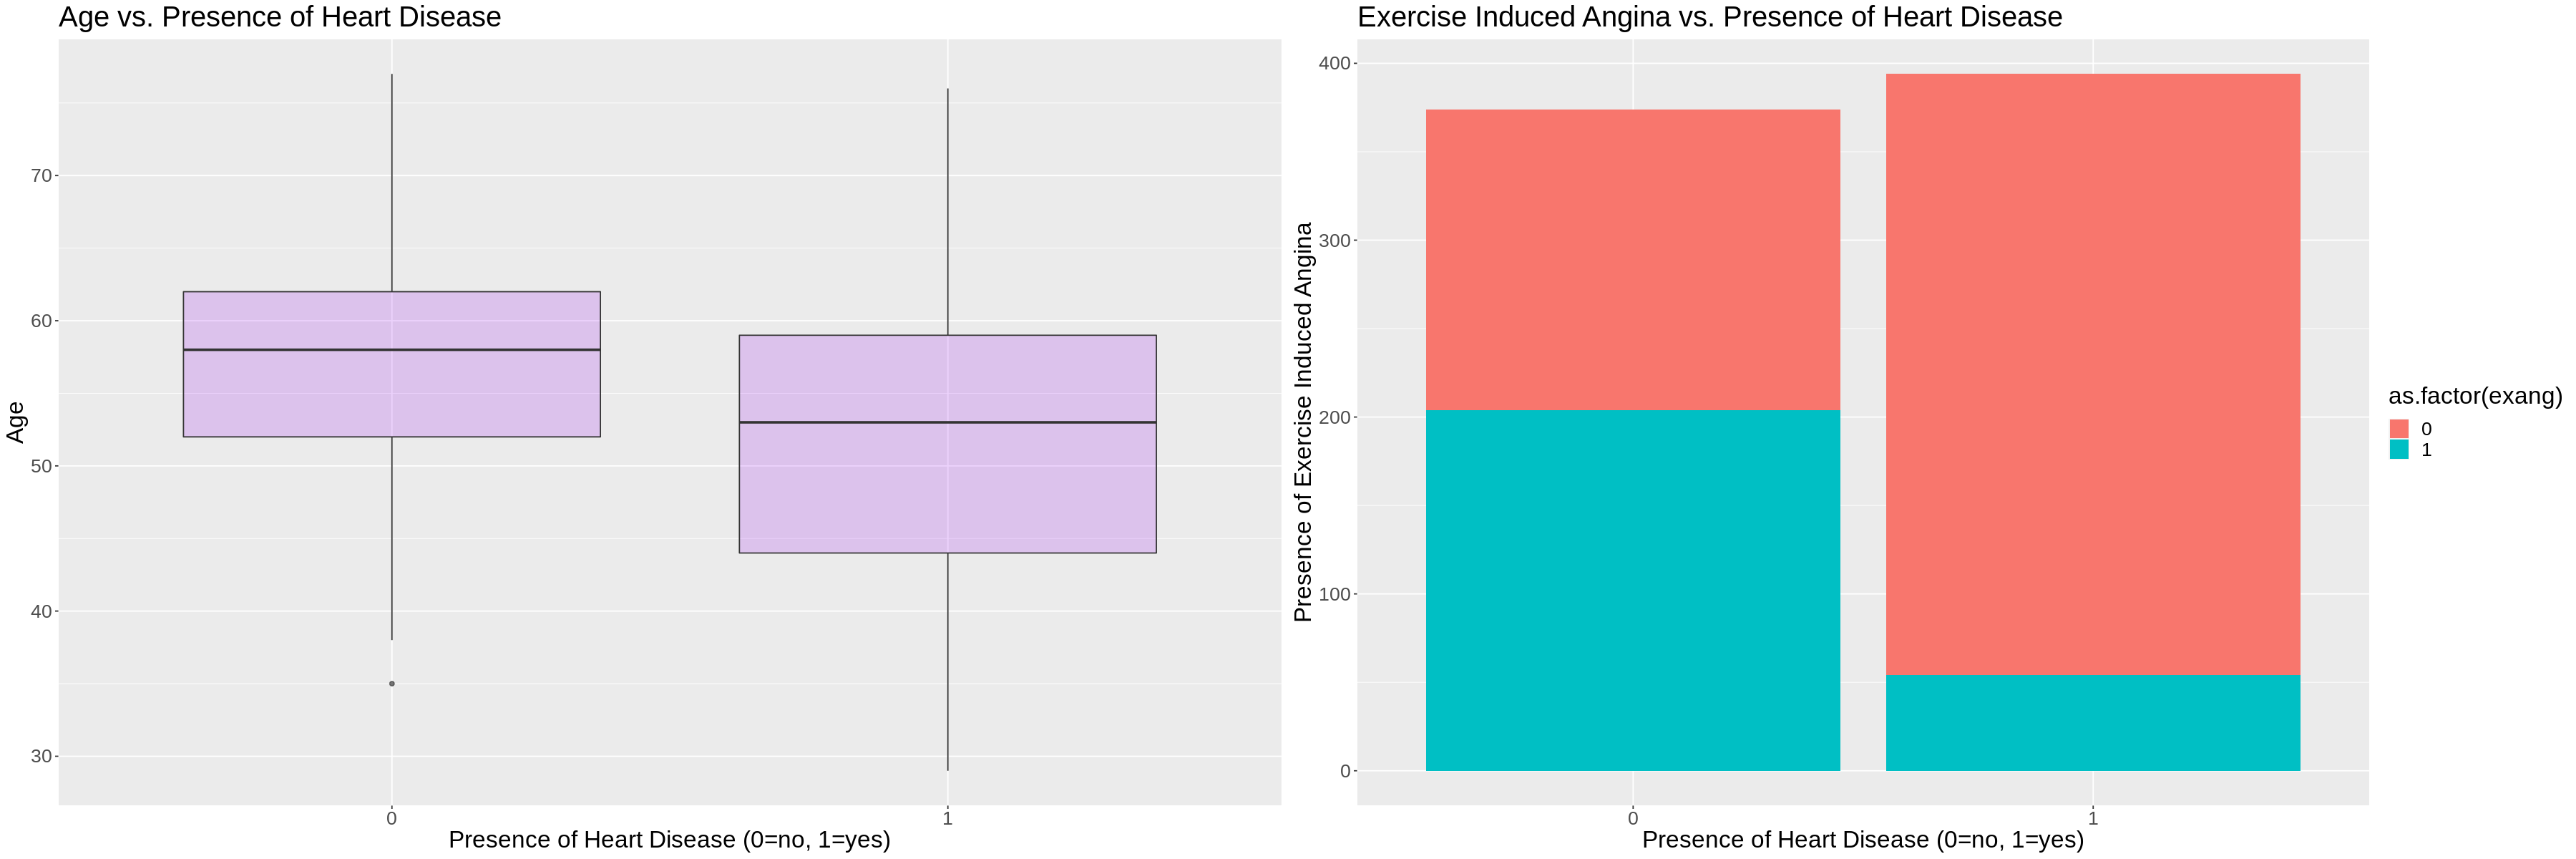

In [5]:
options(repr.plot.width = 30, repr.plot.height = 10)
chol_plot <- ggplot(heart_train, 
     aes(y = chol, 
           x = as.factor(target))) +
     geom_boxplot(fill = "slateblue", alpha = 0.2)+
     labs(x = "Presence of Heart Disease (0=no, 1=yes)", y = "Cholesteral Level" )+
     theme(text = element_text(size = 20))+
     ggtitle("Serum Cholesterol Level vs. Presence of Heart Disease")

trestbps_plot<- ggplot(heart_train,
    aes(y = trestbps,
            x = as.factor(target))) +
    geom_boxplot(fill = "red", alpha = 0.2)+
    labs(x="Presence of Heart Disease (0=no, 1=yes)", y = "Resting Blood Pressure" )+
    theme(text = element_text(size = 20))+
    ggtitle("Resting Heart Blood Pressure vs. Presence of Heart Disease")

       
thalach_plot <- ggplot(heart_train,
        aes(y = thalach,
            x = as.factor(target))) +
    geom_boxplot(fill = "green", alpha = 0.2)+
    labs(x = "Presence of Heart Disease (0=no, 1=yes)", y = "Maximum Heart Rate Achieved" )+
    theme(text = element_text(size = 20))+
    ggtitle("Maximum Heart Rate Achieved vs. Presence of Heart Disease")

print("Figure 3.3: Variable Distributions Across Diagnosis")
grid.arrange(chol_plot, trestbps_plot, thalach_plot, ncol = 3)

age_plot<- ggplot(heart_train,
        aes(y = age,
            x = as.factor(target))) +
    geom_boxplot(fill = "purple", alpha = 0.2)+
    labs(x = "Presence of Heart Disease (0=no, 1=yes)", y = "Age" )+
    theme(text = element_text(size = 20))+
    ggtitle("Age vs. Presence of Heart Disease")

exang_plot <- ggplot(heart_train, aes(x = target, fill = as.factor(exang)))+
   geom_bar()+
   labs(x = "Presence of Heart Disease (0=no, 1=yes)", y = "Presence of Exercise Induced Angina")+
   theme(text = element_text(size = 20))+
   ggtitle("Exercise Induced Angina vs. Presence of Heart Disease")

grid.arrange(age_plot, exang_plot, ncol = 2)

Looking at the above plots for serum cholesterol level, it can be seen the mean levels for individuals with heart disease is slightly lower than the mean cholesterol levels for individuals who do not have heart disease. This is slightly surprising as, the general trend found through research is that higher serum cholesterol levels tends to increase risks of developing heart disease. 

Regarding resting blood pressure, there was not a large difference in the mean values between individuals with heart disease. From this graph alone, there is a suggestion that there is not a strong correlation between the presence of heart disease, and high or low resting blood pressure values. In reference to the maximum heart rate achieved, there is a higher mean value for individuals with a presence of heart disease. This is supported by research which suggests that a higher resting heart rate could indicate an increased risk of developing heart disease.

Referencing the age plot, the mean age value is smaller among the individuals who have heart disease. In general, the risks of heart disease increases as one ages, making this result somewhat unexpected. This result could be due to the fact that individuals who do not have heart disease tending to live longer or, sampling error.

Overall, we did not observe that the trends shown by the plot were similar to trends typically found and understood in other research.

#### The predictor variables that we will test are: `age`, `thalach`, and `exang`.

### 4. Analyzing and Selecting Predictor Variables

To select our predictor variables, we will tune models and create distinct recipes for each set of predictor variables, and then compare the accuracy of the models.
We will set neighbors to tune() in our K-NN recipe in combination with 5-fold cross-validation so that each model that we compare will be at its optimal accuracy.
Note that *k* values used for the cross-validation will be values from 1 to 50.
For now, it does not completely matter if the accuracy is maximized (if we have the best *k* value), as we are analyzing how a predictor variable affects the model.
The data must also be scaled and centered, as the ranges of variables are different.

In [6]:
heart_vfold <- vfold_cv(heart_train, v = 5, strata = target)

gridvals <- tibble(neighbors = seq(1, 50))

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")

In [7]:
h_recipe <- recipe(target ~ age, heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

h_results <- workflow() |>
    add_recipe(h_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

h_results_best <- h_results |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(mean)

In [8]:
ht_recipe <- recipe (target ~ age + thalach, heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

ht_results <- workflow() |>
    add_recipe(ht_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

ht_results_best <- ht_results |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(mean)

In [9]:
hto_recipe <- recipe (target ~ age + thalach + exang, data = heart_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

hto_results <- workflow() |>
    add_recipe(hto_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

hto_results_best <- hto_results |>
    arrange(desc(mean)) |>
    slice(1) |>
    pull(mean)

In [10]:
model <- c("target ~ age", "target ~ age + thalach", "target ~ age + thalach + exang")
accuracies <- c(h_results_best, ht_results_best, hto_results_best)
acc_table <- tibble(`Recipe Input` = character(), Accuracy = numeric()) |>
    add_row(`Recipe Input` = model, Accuracy = accuracies)

print("Table 4.1: Resulting Accurracies of Different Predictor Variables")
acc_table

[1] "Table 4.1: Resulting Accurracies of Different Predictor Variables"


Recipe Input,Accuracy
<chr>,<dbl>
target ~ age,0.6172420
target ~ age + thalach,0.9310834
target ~ age + thalach + exang,0.9388927


From Table 4.1, we can conclude that all three of these predictor variables are meaningful and increase the prediction accuracy. Knowing this, we can now use the recipe with all three predictor variables to build our model. 

### 5. Finding the Optimal `k` Value and Building the Final Model

To begin, new components that need to be updated will be built for the final model. A new set of *k* values will need to be tested. We will thus tune our model with various *k* values, and pick the best one through a visualization. 

In [ ]:
k_values <- tibble(neighbors = seq(from = 1, to = 100, by = 1))

# heart_vfold, hto_recipe, and knn_spec are previously defined
patient_results <- workflow() |>
    add_recipe(hto_recipe) |>
    add_model(knn_spec) |>
    tune_grid(resamples = heart_vfold, grid = k_values) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

In [ ]:
options(repr.plot.width = 15, repr.plot.height = 8)

best_k_y <- patient_results |>
    filter(neighbors == 50) |>
    pull(mean)

k_accuracies_plot <- patient_results |>
    ggplot(aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    geom_vline(xintercept = 50, colour = "steelblue") +
    geom_point(aes(x = 50, y = best_k_y), size = 3, colour = "blue") +
    labs(x = "K Value", y = "5 Average CV Accuracy") +
    ggtitle("Figure 5.1: Accuracies Across Different K Values") +
    theme(text = element_text(size = 20)) +
    theme(plot.title = element_text(hjust = 0.5))

k_accuracies_plot

We can see in Figure 5.1 that at `k = 50`, there is a 3-point maximum plateau. This shows that there is a consistency in the maximum value, which increases the validity of this value. Knowing this, we will choose a value of k = 50 for our model.

#### Building the Final Model

Using our newly selected *k* value, we will build a new specification model as well as a new workflow.

In [13]:
best_knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 50) |>
  set_engine("kknn") |>
  set_mode("classification")

# hto_recipe is previously defined
patient_fit <- workflow() |>
    add_recipe(hto_recipe) |>
    add_model(best_knn_spec) |>
    fit(data = heart_train)

print("Figure 5.2: Final Classification Model")
patient_fit

[1] "Figure 5.2: Final Classification Model"


══ Workflow [trained] ══════════════════════════════════════════════════════════
Preprocessor: Recipe
Model: nearest_neighbor()

── Preprocessor ────────────────────────────────────────────────────────────────
2 Recipe Steps

• step_scale()
• step_center()

── Model ───────────────────────────────────────────────────────────────────────

Call:
kknn::train.kknn(formula = ..y ~ ., data = data, ks = min_rows(50,     data, 5), kernel = ~"rectangular")

Type of response variable: nominal
Minimal misclassification: 0.2526042
Best kernel: rectangular
Best k: 50

#### 6. Model Evaluation and Conclusion

Now, by fitting our test set (`heart_test`) with `patient fit`, we will evaluate the model that has been created. 

In [16]:
patient_predictions <- predict(patient_fit, heart_test) |>
    bind_cols(heart_test)
patient_acc <- patient_predictions |>
    metrics(truth = target, estimate = .pred_class) |>
    select(.metric, .estimate) |>
    head(1)

print("Table 6.1: Model Accuracy on the Testing Set")
patient_acc

[1] "Table 6.1: Model Accuracy on the Testing Set"


.metric,.estimate
<chr>,<dbl>
accuracy,0.7548638


### Discussion:
** summarize what you found
discuss whether this is what you expected to find?
discuss what impact could such findings have?
discuss what future questions could this lead to? **



### References:
** At least 2 citations of literature relevant to the project (format is your choice, just be consistent across the references).
Make sure to cite the source of your data as well. **